<a href="https://colab.research.google.com/github/muhammadzulva21/image_fundamental/blob/main/neural_network/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import os

# Definisikan path untuk data train dan data validation

base_dir = '/content/drive/MyDrive/Daun Sawit'

bercak_dir = os.path.join(base_dir, 'bercak')
normal_dir = os.path.join(base_dir, 'normal')

train_normal_dir = os.path.join(normal_dir, 'train')
train_bercak_dir = os.path.join(bercak_dir, 'train')

validasi_normal_dir = os.path.join(normal_dir, 'validasi')
validasi_bercak_dir = os.path.join(bercak_dir, 'validasi')

In [31]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_normal_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (600,400))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            train_label.append(label)


for r, d, f in os.walk(train_bercak_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (600,400))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [32]:
len(train_data)

240

In [33]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validasi_normal_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (600,400))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            val_label.append(label)

for r, d, f in os.walk(validasi_bercak_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (600,400))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-3]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [34]:
len(val_label)

80

<h3>Data Preprocessing</h3>

In [35]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (240, 400, 600, 3)
Train Label =  (240,)
Validation Data =  (80, 400, 600, 3)
Validation Label =  (80,)


In [36]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 244 242]
Data setelah di-normalisasi  [1.         0.95686275 0.9490196 ]


In [37]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[10:20])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[10:20])

Label sebelum di-encoder  ['normal' 'normal' 'normal' 'normal' 'normal' 'bercak' 'bercak' 'bercak'
 'bercak' 'bercak']
Label setelah di-encoder  [1 1 1 1 1 0 0 0 0 0]


<h3>Definisikan Model</h3>

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [44]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[400,600,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [45]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
# Print model summary
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 400, 600, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 200, 300, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 200, 300, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 100, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 100, 150, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 50, 75, 64)      

In [47]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

<h3>Training Model</h3>

In [48]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
12/12 [==============================] - 59s 5s/step - loss: 1.8782 - acc: 0.7667 - val_loss: 0.2275 - val_acc: 0.9375
Epoch 2/15
12/12 [==============================] - 56s 5s/step - loss: 0.2937 - acc: 0.9375 - val_loss: 0.3065 - val_acc: 0.9375
Epoch 3/15
12/12 [==============================] - 62s 5s/step - loss: 0.2203 - acc: 0.9375 - val_loss: 0.2229 - val_acc: 0.9375
Epoch 4/15
12/12 [==============================] - 56s 5s/step - loss: 0.2257 - acc: 0.9375 - val_loss: 0.3035 - val_acc: 0.9375
Epoch 5/15
12/12 [==============================] - 56s 5s/step - loss: 0.2192 - acc: 0.9375 - val_loss: 0.2252 - val_acc: 0.9375
Epoch 6/15
12/12 [==============================] - 57s 5s/step - loss: 0.1398 - acc: 0.9375 - val_loss: 0.1947 - val_acc: 0.9375
Epoch 7/15
12/12 [==============================] - 56s 5s/step - loss: 0.0975 - acc: 0.9375 - val_loss: 0.2020 - val_acc: 0.9375
Epoch 8/15
12/12 [==============================] - 57s 5s/step - loss: 0.0703 - acc: 0.94

<h3>Evaluasi Model</h3>

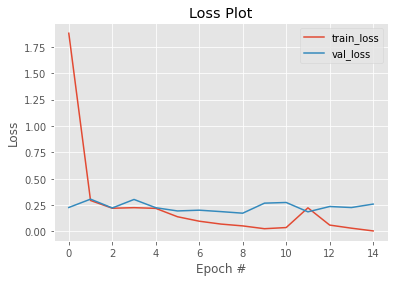

In [49]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

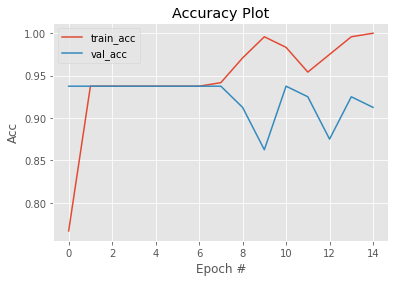

In [50]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [51]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.25      0.20      0.22         5

    accuracy                           0.91        80
   macro avg       0.60      0.58      0.59        80
weighted avg       0.90      0.91      0.91        80



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
